In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.shape

(150, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_width', ylabel='Count'>

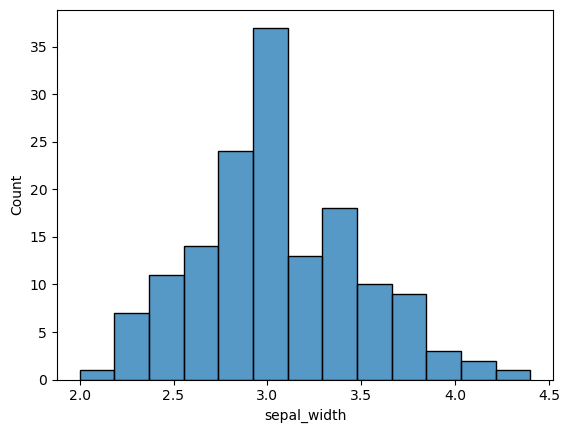

In [13]:
sns.histplot(x='sepal_width',data=df)

<Axes: xlabel='sepal_length', ylabel='Count'>

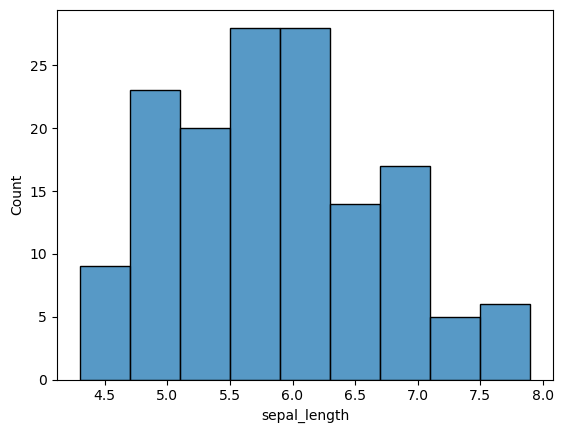

In [14]:
sns.histplot(x='sepal_length',data=df)

<Axes: xlabel='petal_width', ylabel='Count'>

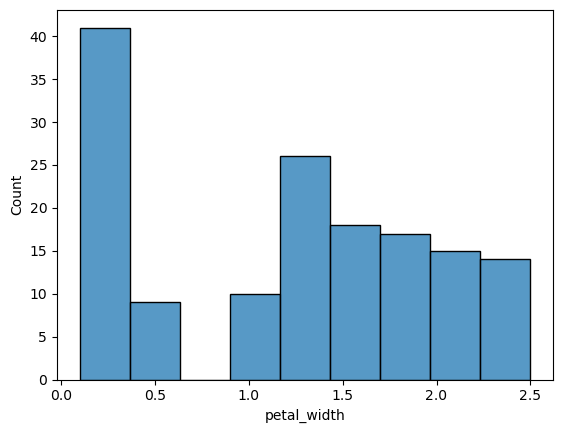

In [15]:
sns.histplot(x='petal_width',data=df)

<Axes: xlabel='petal_width', ylabel='Count'>

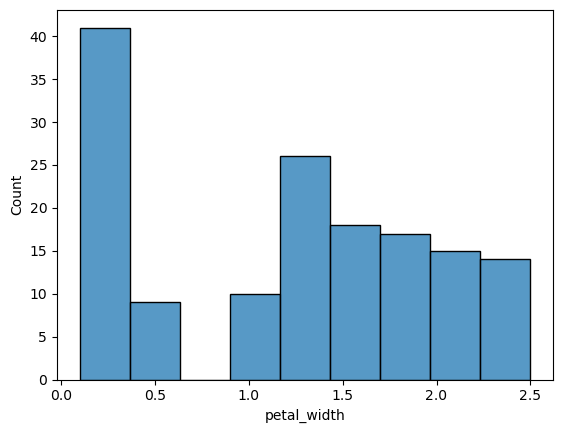

In [16]:
sns.histplot(x='petal_width',data=df)

<Axes: xlabel='sepal_width', ylabel='species'>

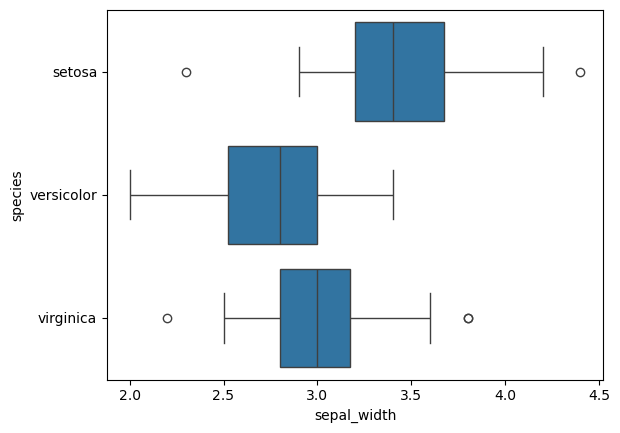

In [17]:
sns.boxplot(x='sepal_width',y='species',data=df)

<Axes: xlabel='sepal_length', ylabel='species'>

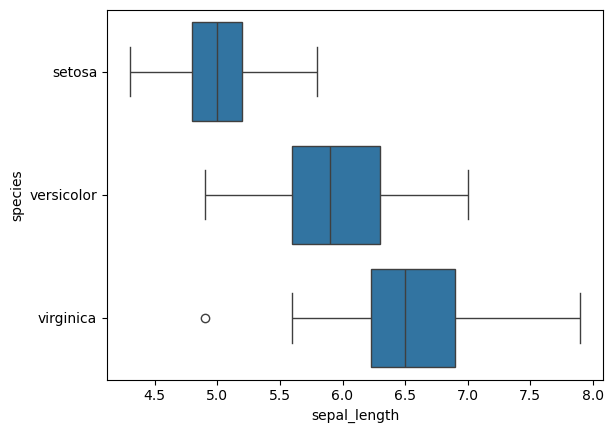

In [19]:
sns.boxplot(x='sepal_length',y='species',data=df)

<Axes: xlabel='petal_width', ylabel='species'>

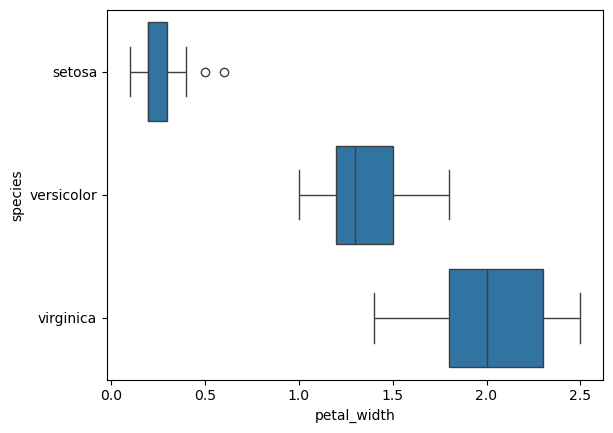

In [20]:
sns.boxplot(x='petal_width',y='species',data=df)

<Axes: xlabel='petal_length', ylabel='species'>

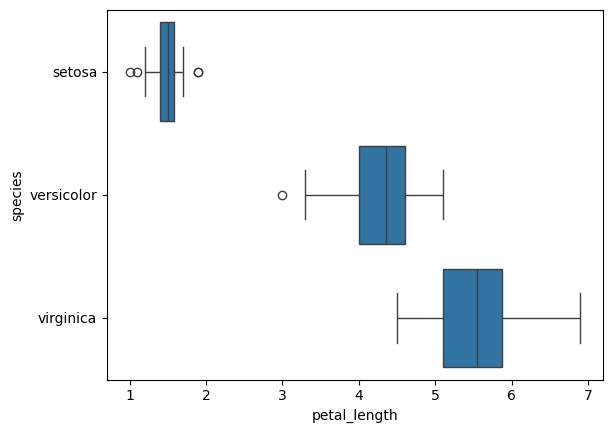

In [21]:
sns.boxplot(x='petal_length',y='species',data=df)

In [22]:
def detect_outliers(data):
    outlier = []
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    lwr_bnd = q1-(1.5*iqr)
    upr_bnd = q3+(1.5*iqr)
    for i in data:
        if(i<lwr_bnd or i>upr_bnd):
            outlier.append(i)
    return outlier,lwr_bnd,upr_bnd

In [23]:
detect_outliers(df['sepal_length'])

([], 3.1499999999999986, 8.350000000000001)

In [25]:
detect_outliers(df['sepal_width'])

([2.0, 4.1, 4.2, 4.4], 2.05, 4.05)

In [26]:
detect_outliers(df['petal_width'])

([], -1.95, 4.05)

In [27]:
detect_outliers(df['petal_length'])

([], -3.649999999999999, 10.349999999999998)

In [30]:
outlier,lower_bnd,upper_bnd = detect_outliers(df['sepal_width'])
df['cleaned_sepal_width'] = df['sepal_width'].where((df['sepal_width']>=lower_bnd) & (df['sepal_width']<=upper_bnd))

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cleaned_sepal_width
0,5.1,3.5,1.4,0.2,setosa,3.5
1,4.9,3.0,1.4,0.2,setosa,3.0
2,4.7,3.2,1.3,0.2,setosa,3.2
3,4.6,3.1,1.5,0.2,setosa,3.1
4,5.0,3.6,1.4,0.2,setosa,3.6


In [32]:
df.isnull().sum()

sepal_length           0
sepal_width            0
petal_length           0
petal_width            0
species                0
cleaned_sepal_width    4
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

sepal_length           0
sepal_width            0
petal_length           0
petal_width            0
species                0
cleaned_sepal_width    0
dtype: int64

<Axes: xlabel='sepal_width', ylabel='Count'>

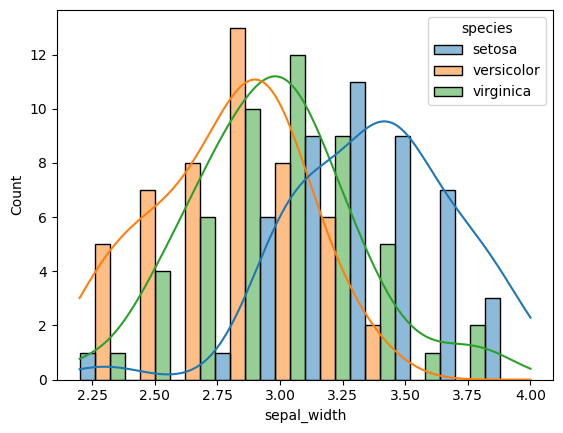

In [35]:
sns.histplot(x='sepal_width',hue='species',kde=True,multiple='dodge',data=df)

<Axes: xlabel='petal_width', ylabel='Count'>

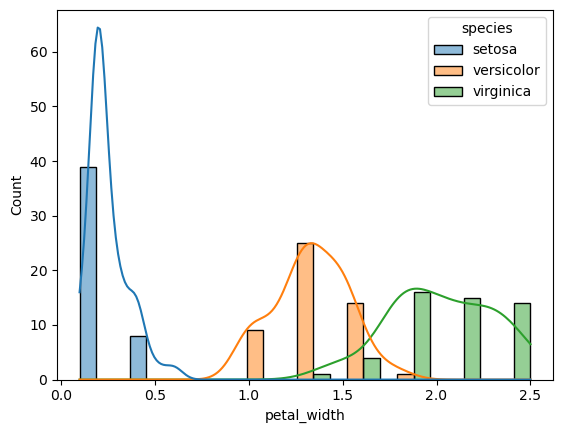

In [36]:
sns.histplot(x='petal_width',hue='species',kde=True,multiple='dodge',data=df)